In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('stress.csv')

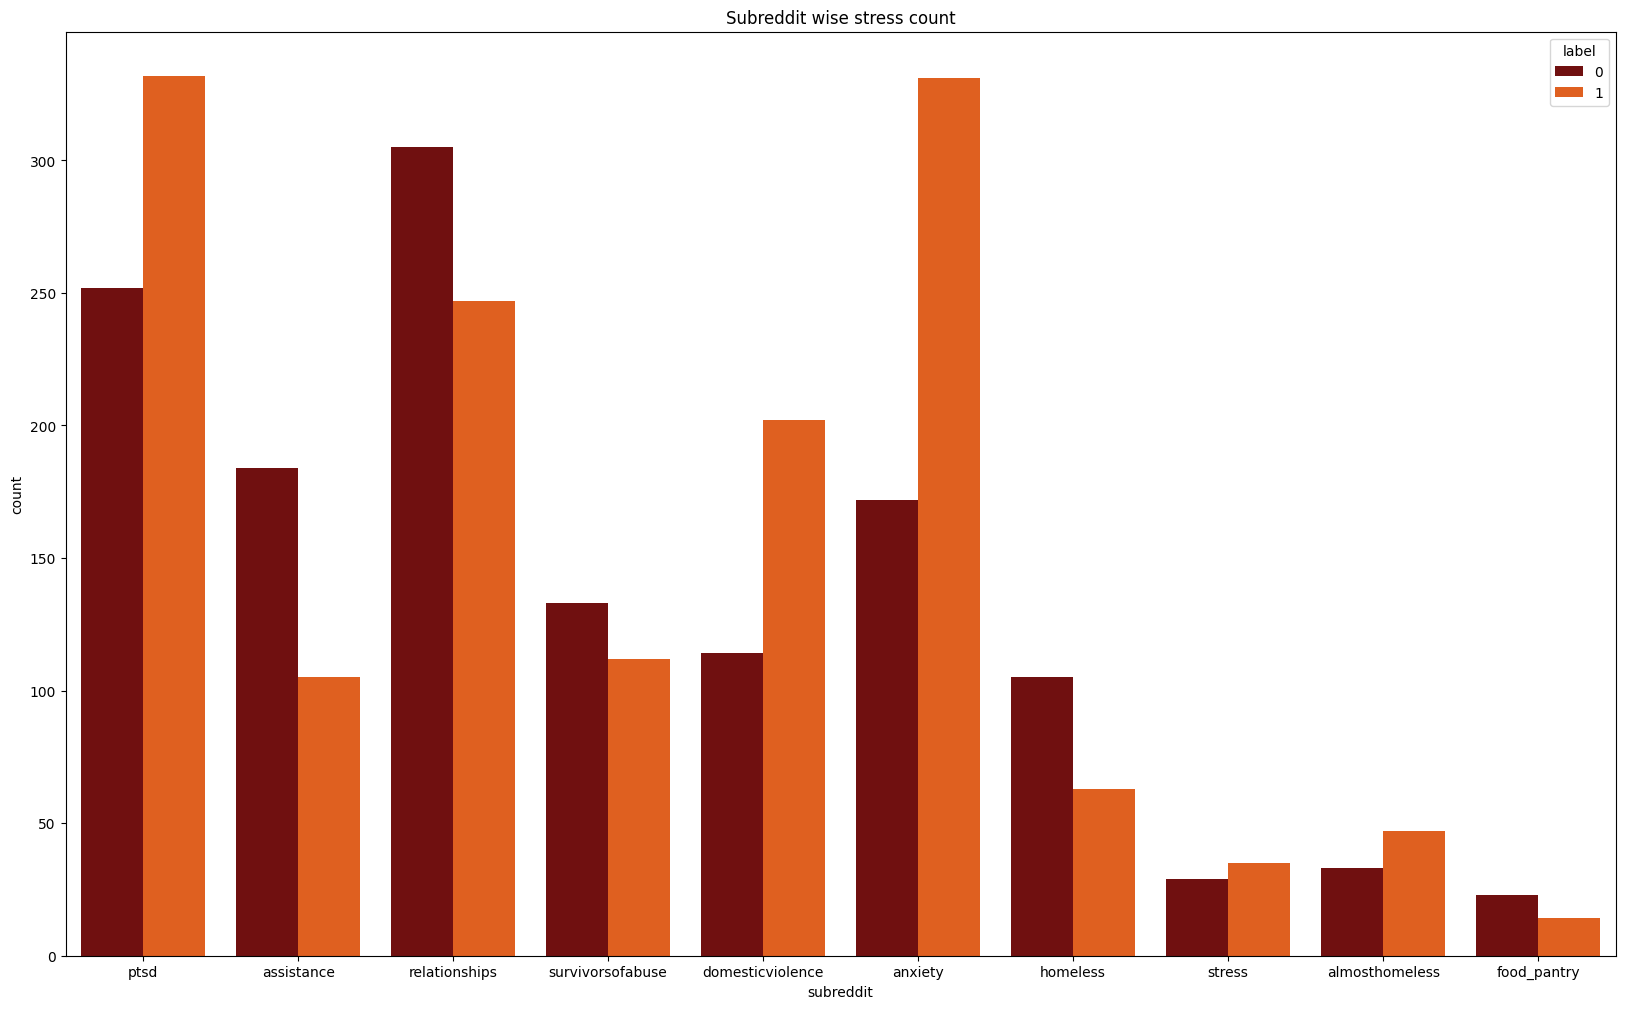

In [ ]:
plt.figure(figsize=(20,12))
plt.title('Subreddit wise stress count')
plt.xlabel('Subreddit')
sns.countplot(data=data,x='subreddit',hue='label',palette='gist_heat')
plt.show()

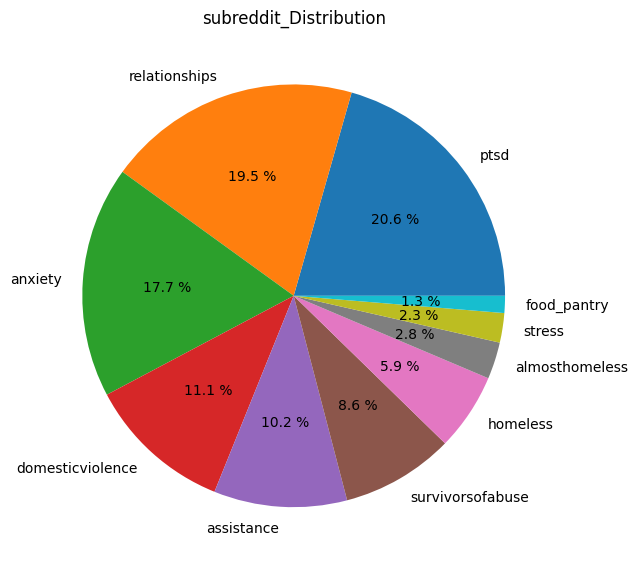

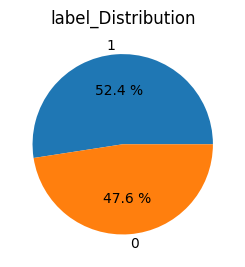

In [ ]:
lst=['subreddit','label']
plt.figure(figsize=(15,12))
for i in range(len(lst)):
    plt.subplot(1,2,i+1)
    a=data[lst[i]].value_counts()
    lbl=a.index
    plt.title(lst[i]+'_Distribution')
    plt.pie(x=a,labels=lbl,autopct="%.1f %%")
    plt.show()

In [ ]:
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
data.iloc[:5]

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
data.iloc[0]['text']

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import string


def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data["text"] = data["text"].apply(clean)


In [ ]:
data['text']

0       he said he had not felt that way before  sugge...
1       hey there r assistance  not sure if this is th...
2       my mom then hit me with the newspaper and it s...
3       until i met my new boyfriend  he is amazing  h...
4       october is domestic violence awareness month a...
                              ...                        
2833      her  a week ago  precious  how are you   i i...
2834    i don t have the ability to cope with it anymo...
2835    in case this is the first time you re reading ...
2836    do you find this normal  they have a good rela...
2837    i was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
data['text']=data['text'].apply(word_tokenize)

In [ ]:
data['text']

0       [he, said, he, had, not, felt, that, way, befo...
1       [hey, there, r, assistance, not, sure, if, thi...
2       [my, mom, then, hit, me, with, the, newspaper,...
3       [until, i, met, my, new, boyfriend, he, is, am...
4       [october, is, domestic, violence, awareness, m...
                              ...                        
2833    [her, a, week, ago, precious, how, are, you, i...
2834    [i, don, t, have, the, ability, to, cope, with...
2835    [in, case, this, is, the, first, time, you, re...
2836    [do, you, find, this, normal, they, have, a, g...
2837    [i, was, talking, to, my, mom, this, morning, ...
Name: text, Length: 2838, dtype: object

Remove Stopwords

In [ ]:
def remove_stopwords(text):
    stpw=set(stopwords.words('english'))
    filtered_text=[word for word in text if word not in stpw]
    return filtered_text

In [ ]:
data['text']=data['text'].apply(remove_stopwords)

In [ ]:
data['text']

0       [said, felt, way, suggeted, go, rest, trigger,...
1       [hey, r, assistance, sure, right, place, post,...
2       [mom, hit, newspaper, shocked, would, knows, l...
3       [met, new, boyfriend, amazing, kind, sweet, go...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [week, ago, precious, ignored, jan, happy, yea...
2834    [ability, cope, anymore, trying, lot, things, ...
2835    [case, first, time, reading, post, looking, pe...
2836    [find, normal, good, relationship, main, probl...
2837    [talking, mom, morning, said, sister, trauma, ...
Name: text, Length: 2838, dtype: object

Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemmatize_words(text):
    lemmer=WordNetLemmatizer()
    lemmatized_text=[lemmer.lemmatize(word,pos='v') for word in text]
    return lemmatized_text

In [ ]:
data['text']=data['text'].apply(lemmatize_words)

In [ ]:
data['text']

0       [say, felt, way, suggeted, go, rest, trigger, ...
1       [hey, r, assistance, sure, right, place, post,...
2       [mom, hit, newspaper, shock, would, know, like...
3       [meet, new, boyfriend, amaze, kind, sweet, goo...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [week, ago, precious, ignore, jan, happy, year...
2834    [ability, cope, anymore, try, lot, things, tri...
2835    [case, first, time, read, post, look, people, ...
2836    [find, normal, good, relationship, main, probl...
2837    [talk, mom, morning, say, sister, trauma, wors...
Name: text, Length: 2838, dtype: object

In [ ]:
data['length']=data['text'].apply(lambda x : len(x))

Creating Corpus

In [ ]:
data['text']=data['text'].apply(lambda x : ' '.join([index for index in x]))

In [ ]:
data['text']

0       say felt way suggeted go rest trigger ahead yo...
1       hey r assistance sure right place post go curr...
2       mom hit newspaper shock would know like play h...
3       meet new boyfriend amaze kind sweet good stude...
4       october domestic violence awareness month dome...
                              ...                        
2833    week ago precious ignore jan happy year precio...
2834    ability cope anymore try lot things trigger sh...
2835    case first time read post look people will com...
2836    find normal good relationship main problem see...
2837    talk mom morning say sister trauma worse mine ...
Name: text, Length: 2838, dtype: object

In [ ]:
X=data['text']
y=data['label']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X, y, stratify=y, test_size=0.25)

In [ ]:
vect=TfidfVectorizer()

In [ ]:
xtrain=vect.fit_transform(xtrain)
xtest=vect.transform(xtest)

In [ ]:
#creating list to store all algorithms
classification_models = {}
model_scores={}

SVC

Accuracy score :  0.7507042253521127


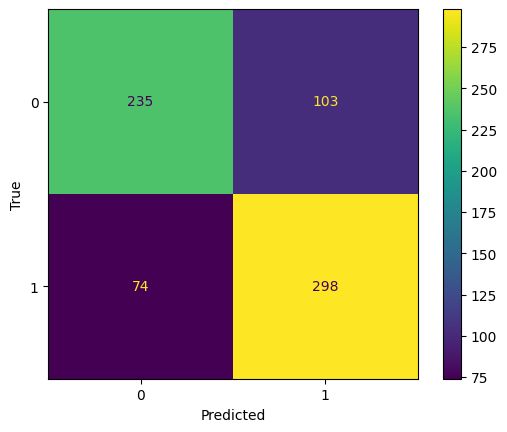

Accuracy: 0.751
Precision: 0.743
Recall: 0.801
F1 Score: 0.771
Sensitivity: 0.801
Specifity: 0.695
Error Rate: 0.249
TPR: 0.801
FPR: 0.305
AUC: 0.748


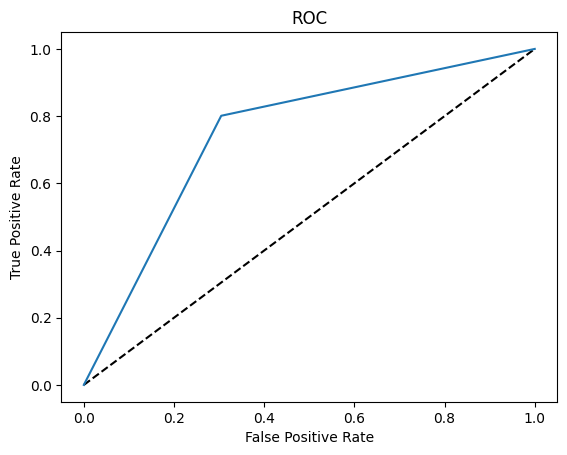

In [ ]:
from sklearn.svm import SVC

model=SVC()
model.fit(xtrain,ytrain)

Y_predsv = model.predict(xtest)

sv_accuracy = accuracy_score(ytest, Y_predsv)
print('Accuracy score : ',sv_accuracy)

classification_models["SVC"] = sv_accuracy
# prediction visualization
cm = confusion_matrix(ytest,Y_predsv)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

model_scores["SVC"]= f1

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(ytest, Y_predsv)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

BernoulliNB

Accuracy score :  0.7140845070422536


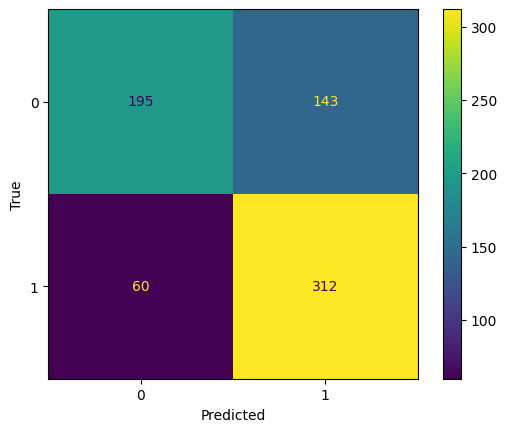

Accuracy: 0.714
Precision: 0.686
Recall: 0.839
F1 Score: 0.755
Sensitivity: 0.839
Specifity: 0.577
Error Rate: 0.286
TPR: 0.839
FPR: 0.423
AUC: 0.708


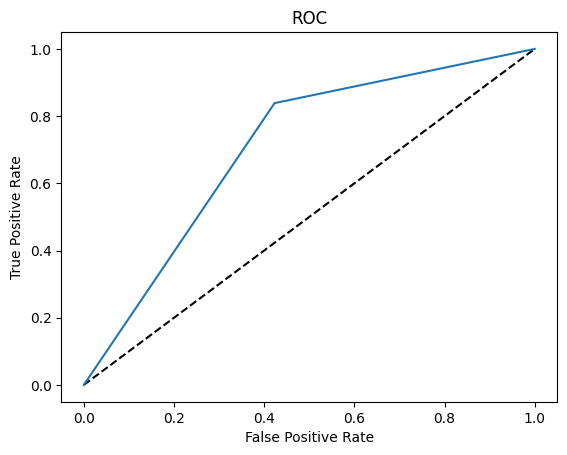

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model1 = BernoulliNB()
model1.fit(xtrain, ytrain)

Y_predb = model1.predict(xtest)

b_accuracy = accuracy_score(ytest, Y_predb)
print('Accuracy score : ',b_accuracy)

classification_models["BernoulliNB"] = b_accuracy
# prediction visualization
cm = confusion_matrix(ytest,Y_predb)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

model_scores["BernoulliNB"]= f1
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(ytest, Y_predb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Logistic Regression

Accuracy score :  0.7591549295774648


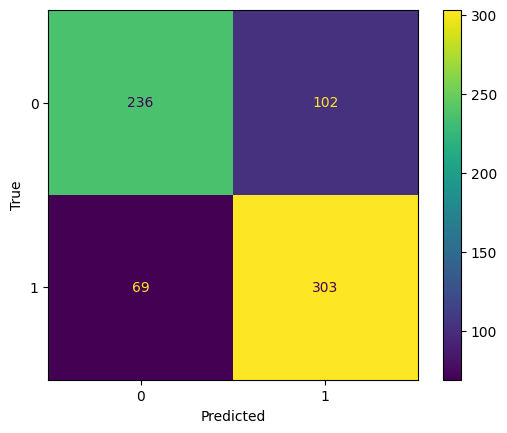

Accuracy: 0.759
Precision: 0.748
Recall: 0.815
F1 Score: 0.780
Sensitivity: 0.815
Specifity: 0.698
Error Rate: 0.241
TPR: 0.815
FPR: 0.302
AUC: 0.756


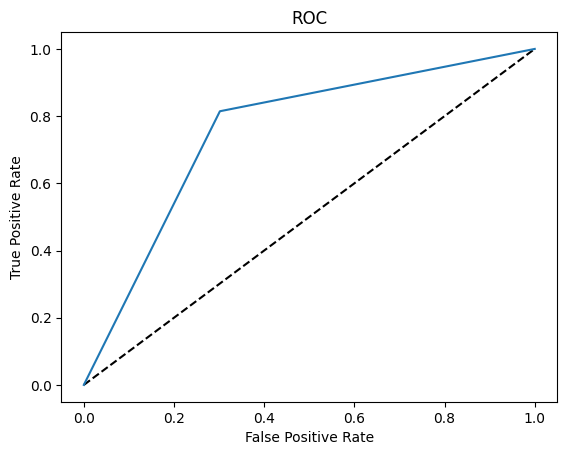

In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(xtrain, ytrain)

Y_preda = model2.predict(xtest)

a_accuracy = accuracy_score(ytest, Y_preda)
print('Accuracy score : ',a_accuracy)

classification_models["LogisticRegression"] = a_accuracy
# prediction visualization
cm = confusion_matrix(ytest,Y_preda)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

model_scores["Logistic Regression"]= f1
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(ytest, Y_preda)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


SGDCClassifier

Accuracy score :  0.6943661971830986


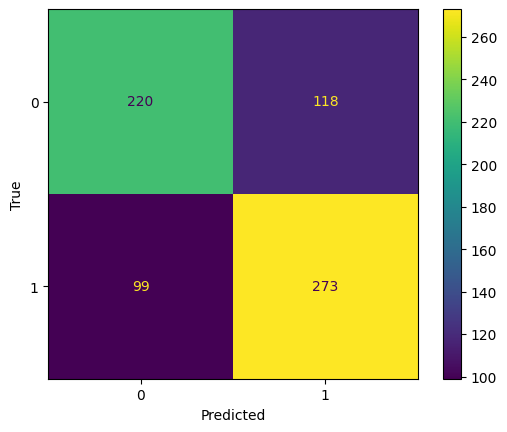

Accuracy: 0.694
Precision: 0.698
Recall: 0.734
F1 Score: 0.716
Sensitivity: 0.734
Specifity: 0.651
Error Rate: 0.306
TPR: 0.734
FPR: 0.349
AUC: 0.692


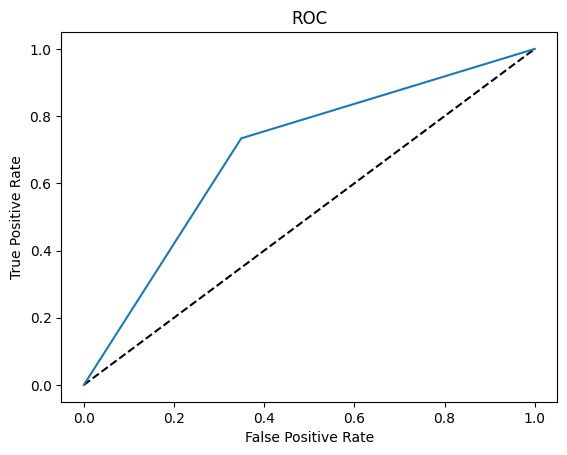

In [ ]:
from sklearn.linear_model import SGDClassifier

model3 = SGDClassifier()
model3.fit(xtrain, ytrain)

Y_predl = model3.predict(xtest)

l_accuracy = accuracy_score(ytest, Y_predl)
print('Accuracy score : ',l_accuracy)

classification_models["SGDClassifier"] = l_accuracy
# prediction visualization
cm = confusion_matrix(ytest,Y_predl)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

model_scores["SDGClassifier"]= f1

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(ytest, Y_predl)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Testing SVC Model

In [ ]:
input=pd.DataFrame({
    'text':['i missed my flight, and its causing me a lot of stress',
            'i cant stop thinking about my to-do list',
            'i had a peaceful evening reading my favorite book',
            'i am really tired',
            'i am looking forward to my birthday celebration',
            'i have a lot of work to do, and its stressing me out']
})

In [ ]:
input['text']=input['text'].apply(word_tokenize)
input['text']=input['text'].apply(remove_stopwords)
input['text']=input['text'].apply(lemmatize_words)
input['text']=input['text'].apply(lambda x : ' '.join([index for index in x]))

In [ ]:
input

,text
0,"miss flight , cause lot stress"
1,cant stop think to-do list
2,peaceful even read favorite book
3,really tire
4,look forward birthday celebration
5,"lot work , stress"


In [ ]:
x_test=vect.transform(input['text'])

In [ ]:
input['predicted']=model.predict(x_test)
input['predicted']=input['predicted'].apply(lambda x : 'Stress' if x == 1 else 'Not Stress')

In [ ]:
input

,text,predicted
0,"miss flight , cause lot stress",Stress
1,cant stop think to-do list,Stress
2,peaceful even read favorite book,Not Stress
3,really tire,Stress
4,look forward birthday celebration,Not Stress
5,"lot work , stress",Stress


Tesing BernoulliNB

In [ ]:
input=pd.DataFrame({
    'text':['i missed my flight, and its causing me a lot of stress',
            'i cant stop thinking about my to-do list',
            'i had a peaceful evening reading my favorite book',
            'i am really tired',
            'i am looking forward to my birthday celebration',
            'i have a lot of work to do, and its stressing me out']
})

In [ ]:
input['text']=input['text'].apply(word_tokenize)
input['text']=input['text'].apply(remove_stopwords)
input['text']=input['text'].apply(lemmatize_words)
input['text']=input['text'].apply(lambda x : ' '.join([index for index in x]))

In [ ]:
input

,text
0,"miss flight , cause lot stress"
1,cant stop think to-do list
2,peaceful even read favorite book
3,really tire
4,look forward birthday celebration
5,"lot work , stress"


In [ ]:
x_test=vect.transform(input['text'])

In [ ]:
input['predicted']=model1.predict(x_test)
input['predicted']=input['predicted'].apply(lambda x : 'Stress' if x == 1 else 'Not Stress')

In [ ]:
input

,text,predicted
0,"miss flight , cause lot stress",Stress
1,cant stop think to-do list,Stress
2,peaceful even read favorite book,Not Stress
3,really tire,Stress
4,look forward birthday celebration,Not Stress
5,"lot work , stress",Stress


Testing LogisticRegression

In [ ]:
input=pd.DataFrame({
    'text':['i missed my flight, and its causing me a lot of stress',
            'i cant stop thinking about my to-do list',
            'i had a peaceful evening reading my favorite book',
            'i am really tired',
            'i am looking forward to my birthday celebration',
            'i have a lot of work to do, and its stressing me out']
})

In [ ]:
input['text']=input['text'].apply(word_tokenize)
input['text']=input['text'].apply(remove_stopwords)
input['text']=input['text'].apply(lemmatize_words)
input['text']=input['text'].apply(lambda x : ' '.join([index for index in x]))

In [ ]:
input

,text
0,"miss flight , cause lot stress"
1,cant stop think to-do list
2,peaceful even read favorite book
3,really tire
4,look forward birthday celebration
5,"lot work , stress"


In [ ]:
x_test=vect.transform(input['text'])

In [ ]:
input['predicted']=model2.predict(x_test)
input['predicted']=input['predicted'].apply(lambda x : 'Stress' if x == 1 else 'Not Stress')

In [ ]:
input

,text,predicted
0,"miss flight , cause lot stress",Stress
1,cant stop think to-do list,Stress
2,peaceful even read favorite book,Not Stress
3,really tire,Stress
4,look forward birthday celebration,Not Stress
5,"lot work , stress",Stress


Testing SGDClassifier

In [ ]:
input=pd.DataFrame({
    'text':['i missed my flight, and its causing me a lot of stress',
            'i cant stop thinking about my to-do list',
            'i had a peaceful evening reading my favorite book',
            'i am really tired',
            'i am looking forward to my birthday celebration',
            'i have a lot of work to do, and its stressing me out']
})

In [ ]:
input['text']=input['text'].apply(word_tokenize)
input['text']=input['text'].apply(remove_stopwords)
input['text']=input['text'].apply(lemmatize_words)
input['text']=input['text'].apply(lambda x : ' '.join([index for index in x]))

In [ ]:
input

,text
0,"miss flight , cause lot stress"
1,cant stop think to-do list
2,peaceful even read favorite book
3,really tire
4,look forward birthday celebration
5,"lot work , stress"


In [ ]:
x_test=vect.transform(input['text'])

In [ ]:
input['predicted']=model3.predict(x_test)
input['predicted']=input['predicted'].apply(lambda x : 'Stress' if x == 1 else 'Not Stress')

In [ ]:
input

,text,predicted
0,"miss flight , cause lot stress",Stress
1,cant stop think to-do list,Stress
2,peaceful even read favorite book,Not Stress
3,really tire,Stress
4,look forward birthday celebration,Not Stress
5,"lot work , stress",Stress


Comparing all models

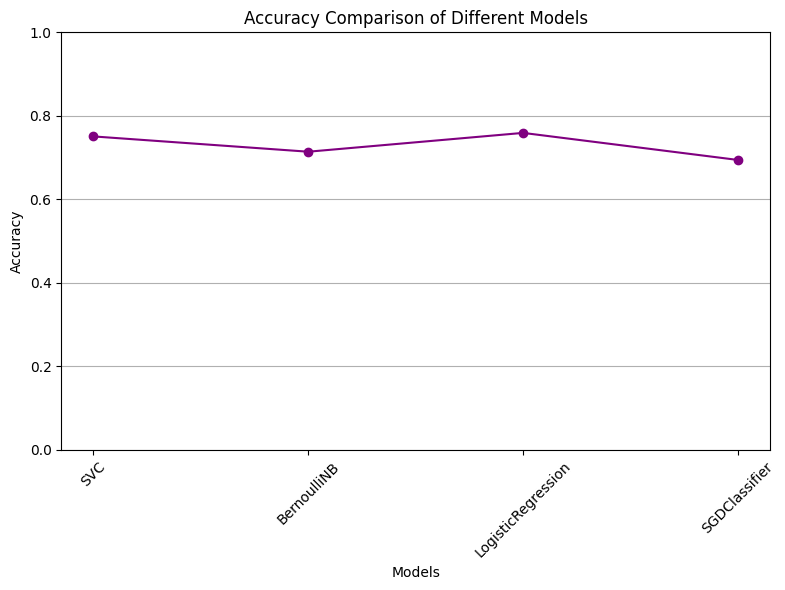

In [ ]:
models = list(classification_models.keys())
accuracy = list(classification_models.values())

plt.figure(figsize=(8, 6))
plt.plot(models, accuracy, marker='o', linestyle='-', color='purple')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
classification_models = list(classification_models.items())

In [ ]:
for alg,accuracy in classification_models:
    print(" The Accuracy of " + alg + " is " + str(accuracy))

 The Accuracy of SVC is 0.7507042253521127
 The Accuracy of BernoulliNB is 0.7140845070422536
 The Accuracy of LogisticRegression is 0.7591549295774648
 The Accuracy of SGDClassifier is 0.6943661971830986


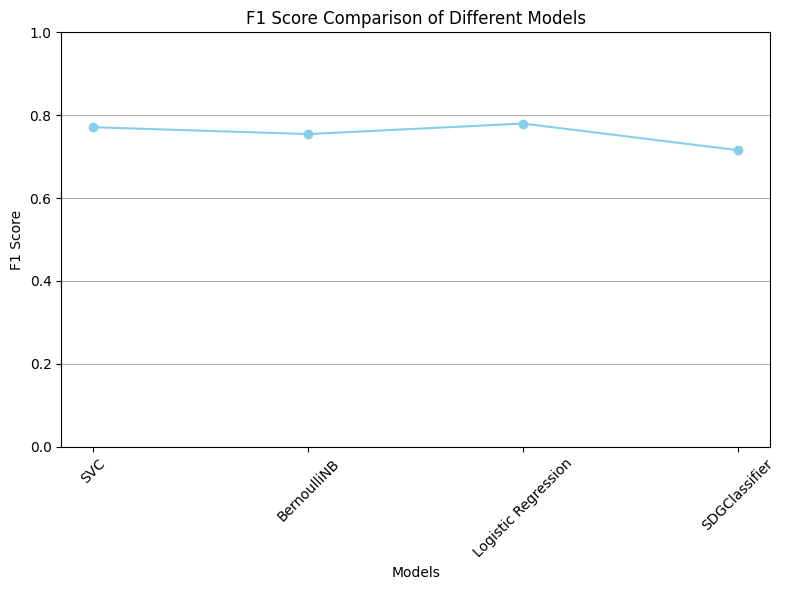

In [ ]:
modelss = list(model_scores.keys())
scoress = list(model_scores.values())

plt.figure(figsize=(8, 6))
plt.plot(modelss, scoress, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for F1 score
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on y-axis
plt.tight_layout()
plt.show()


In [ ]:
model_scores = list(model_scores.items())

In [ ]:
for alg,f1 in model_scores:
    print(" The Accuracy of " + alg + " is " + str(f1))

 The Accuracy of SVC is 0.7710219922380337
 The Accuracy of BernoulliNB is 0.7545344619105201
 The Accuracy of Logistic Regression is 0.7799227799227799
 The Accuracy of SDGClassifier is 0.7155963302752294
